In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import torch.nn.functional as F

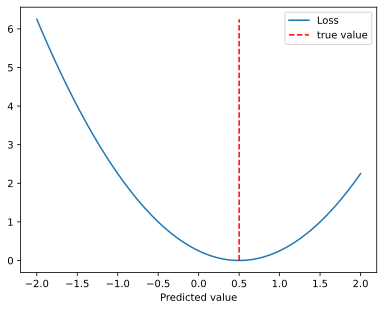

In [2]:
lossfunMSE=nn.MSELoss()
yHat=torch.linspace(-2,2,101)
y=torch.tensor(0.5)
L=np.zeros(101)
for i,yH in enumerate(yHat):
    L[i]=lossfunMSE(yH,y)
plt.plot(yHat,L,label='Loss')
plt.plot([y,y],[0,np.max(L)],'r--',label='true value')
plt.xlabel('Predicted value')
plt.legend()
plt.show()

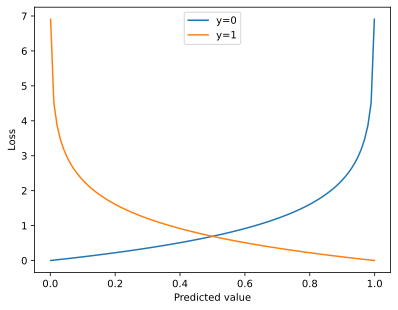

In [5]:
lossfunBCE=nn.BCELoss()
yHat=torch.linspace(0.001,0.999,101)
y1=torch.tensor(0).float()
y2=torch.tensor(1).float()
L=np.zeros((101,2))
for i,yH in enumerate(yHat):
    L[i,0]=lossfunBCE(yH,y1)
    L[i,1]=lossfunBCE(yH,y2)
plt.plot(yHat,L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['y=0','y=1'])

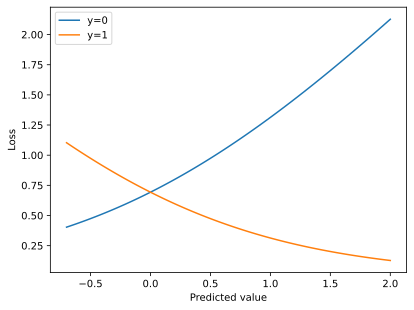

In [13]:
lossfunBCE=nn.BCELoss()
yHat=torch.linspace(-0.7,2,101)
y1=torch.tensor(0).float()
y2=torch.tensor(1).float()
L=np.zeros((101,2))
for i,yH in enumerate(yHat):
    L[i,0]=lossfunBCE(nn.Sigmoid()(yH),y1)
    L[i,1]=lossfunBCE(nn.Sigmoid()(yH),y2)
plt.plot(yHat,L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['y=0','y=1'])

In [20]:
lossfunCE=nn.CrossEntropyLoss()
yHat=torch.tensor([[1.,6,5.4]])
for i in range(3):
    y=torch.tensor([i])
    thisloss=lossfunCE(yHat,y).item()
    print(f'Loss when y is {y.item()} = {thisloss}')

Loss when y is 0 = 5.441828727722168
Loss when y is 1 = 0.4418289363384247
Loss when y is 2 = 1.0418288707733154


In [21]:
lossfunCE=nn.CrossEntropyLoss()
yHat=torch.tensor([[1.,6,5.4]])
sm=nn.Softmax(dim=1)
yHat=sm(yHat) #wrong
for i in range(3):
    y=torch.tensor([i])
    thisloss=lossfunCE(yHat,y).item()
    print(f'Loss when y is {y.item()} = {thisloss}')

Loss when y is 0 = 1.4610769748687744
Loss when y is 1 = 0.8225489854812622
Loss when y is 2 = 1.1125997304916382


In [22]:
lossfunCE=nn.CrossEntropyLoss()
yHat=torch.tensor([[1.,6,5.4]])
sm=nn.LogSoftmax(dim=1)
yHat=sm(yHat)
for i in range(3):
    y=torch.tensor([i])
    thisloss=lossfunCE(yHat,y).item()
    print(f'Loss when y is {y.item()} = {thisloss}')

Loss when y is 0 = 5.441828727722168
Loss when y is 1 = 0.4418289363384247
Loss when y is 2 = 1.0418288707733154
